In [3]:
import numpy as np
from scipy.special import expit

class Neural_Network:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        """This is the intialization function for the Neural Network Networks

        Args:
            inputNodes (int): Input nodes for the input layer of the NN layer (All the pixels)
            hiddenNodes (int): Number of hidden neurons in the hidden layer
            outputNodes (int): Output neurons in the output layers (0-9 in this case of)
            learningRate (float): Explanatory
        """
        self.input_nodes = inputNodes
        self.hidden_nodes = hiddenNodes
        self.output_nodes = outputNodes

        print("input: ", self.input_nodes, ", hidden: ", self.hidden_nodes, ", output: ", self.output_nodes)

        # Linking the weight matrices: wih and who
        #self.wih = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        #self.who = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

        # Try later
        # wih: weigth input to hidden layers
        # who: weight hidden to output layer
        self.wih = np.random.normal(0.0, pow(self.input_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.who = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

        print("Matrix 1: \n", self.wih)
        print("Matrix 2: \n", self.who)

        #learning rate
        self.learning_rate= learningRate

        # Activation function, using the sigmoid function (Values of each neuron)
        self.activation_function = lambda x: expit(x)

    
    def train(self, input_list, target_list):
        """In this function is where we train our Neural Network to deal with the data set, doing both forward and backward
        propagation


        Args:
            input_list (list): list of inputs (numbers to evaluate)
            target_list (list): list of expected results
        """
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T 

        # Calculating and analyzing the Forward propagation
        # Calculate signals into the hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error is the target - actual
        output_errors = targets - final_outputs
        # hidden layer errors is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # Back propagation
        # Update the weights for the links between the hidden and output layers
        self.who += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))


    def use(self, input_list):
        """Using the NN after training it

        Args:
            input_list (input): Complete list of all the input(in this case is all the pixels in the image)
        """
        inputs = np.array(input_list, ndmin=2).T 

        # Calculate signals into hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layers
        hidden_outputs = self.activation_function(hidden_inputs)

        #Calculate signals into final output
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [4]:
example = Neural_Network(3,5,2,0.2)

input:  3 , hidden:  5 , output:  2
Matrix 1: 
 [[-0.53141334  0.22117134  0.87329414]
 [ 0.44771846 -0.35013365  0.05534447]
 [-0.47512594  0.45073068  0.65907922]
 [-0.79218809  0.34066804 -0.78480238]
 [-0.31871885 -2.17200827 -0.09381799]]
Matrix 2: 
 [[ 0.88152692  0.15174789  0.43095143 -0.53773188 -0.19624264]
 [ 0.22456214  0.56678516  0.31443375  1.12678474  0.38345524]]


In [5]:
example.use([0.1,0.2,0.5])

array([[0.64011638],
       [0.76863915]])

In [6]:
training_data_file = open('mnist_dataset\mnist_train_100.csv', 'r')
training_data = training_data_file.readlines()
training_data_file.close()

In [7]:
labels = []
picture = []
for value_in_training_data in training_data:
    splitted_list = value_in_training_data.split(",")
    data_list = np.asfarray(splitted_list)
    labels.append(data_list[0])
    picture.append(data_list[1:])


In [8]:
import matplotlib.pyplot as plt

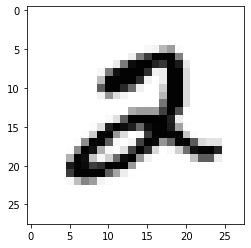

In [9]:
plt.imshow(picture[5].reshape(28,28),cmap="Greys", interpolation="None")

In [10]:
# Training Neural Network
myNN = Neural_Network(784,200,10,0.1)

input:  784 , hidden:  200 , output:  10
Matrix 1: 
 [[-0.04157039 -0.00558526  0.03020218 ...  0.04198686  0.04413752
  -0.0178839 ]
 [-0.06903555 -0.00818682  0.02400916 ...  0.04213163 -0.03125614
  -0.05721711]
 [-0.00379087 -0.01140278  0.00354266 ... -0.03316054  0.02171963
   0.00176289]
 ...
 [-0.0164285   0.00262028  0.05147534 ...  0.06125491 -0.01593371
  -0.0140323 ]
 [-0.00498463  0.00017385 -0.03611316 ...  0.01168532  0.02013769
  -0.02006196]
 [-0.05605544 -0.02414678 -0.01169475 ...  0.03637741 -0.01187092
  -0.02877264]]
Matrix 2: 
 [[-0.07166354  0.07009198 -0.06455587 ... -0.09570178  0.03060389
  -0.09712848]
 [ 0.05255817 -0.19336257  0.11223289 ... -0.05614856  0.08799023
  -0.03432128]
 [ 0.03540157  0.03692446  0.06113952 ... -0.03773823 -0.03227675
  -0.06402628]
 ...
 [ 0.00899859  0.02689192  0.0224552  ... -0.15213573 -0.03966695
   0.07206488]
 [ 0.03038188  0.03602894 -0.01288334 ... -0.02024007  0.03408922
  -0.0663744 ]
 [ 0.10502     0.0224318   0.1325

In [11]:
epochs = 10

for e in range(epochs):
    print("Epoch: ", e + 1)
    for i, _ in enumerate(picture):
        inputs = (picture[i] / 255.0) * 0.99 + 0.01
        targets = np.zeros(10)
        targets[int(labels[i])] = 0.99
        myNN.train(inputs, targets)

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10


In [12]:
myNN.who

array([[-0.18435806,  0.14702843, -0.14838175, ..., -0.10268111,
         0.00838889, -0.11238914],
       [ 0.10751794, -0.40742517,  0.22681659, ..., -0.04504135,
         0.16250287, -0.07668903],
       [ 0.02957702,  0.06082344,  0.01991342, ..., -0.04564318,
        -0.04828814, -0.06398521],
       ...,
       [-0.03045169,  0.03485176,  0.04403779, ..., -0.33386609,
        -0.05336101,  0.13616383],
       [ 0.07995272, -0.03410461, -0.08081173, ...,  0.03514576,
         0.08646402, -0.09332655],
       [ 0.22687331,  0.0486749 ,  0.17247998, ..., -0.01096347,
        -0.11635781, -0.21566955]])

In [13]:
test_data_file = open('mnist_dataset\mnist_test_10.csv', 'r')
test_data = test_data_file.readlines()
test_data_file.close()


In [14]:
test_labels = []
test_results = []
scoreboard = []
for value_in_test_data in test_data:
    splitted_test_list = value_in_test_data.split(",")
    data_test_list = np.asfarray(splitted_test_list)
    test_labels = (int(data_test_list[0]))
    inputs_nn = (data_test_list[1:] / 255 * 0.99) + 0.01
    # Testing
    outputs_nn = myNN.use(inputs_nn)
    label_nn = np.argmax(outputs_nn)
    if label_nn == test_labels:
        scoreboard.append(1)
    else:
        scoreboard.append(0)


In [15]:
scoreboard

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [16]:
scoreboard

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]